In [2]:
## Step 1: Getting the Data
# User-Agent más robusto que Wikipedia acepta
import requests


headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
    "Accept-Language": "es-ES,es;q=0.9,en;q=0.8"
}

url = 'https://en.wikipedia.org/wiki/Big_data'

try:
    response = requests.get(url, headers=headers, timeout=10)
    response.raise_for_status()  # Verifica si hay errores HTTP
    text = response.text
    print(text[:1000])
    print(f"\n✓ Respuesta exitosa. Código de estado: {response.status_code}")
except requests.exceptions.RequestException as e:
    print(f"Error al hacer la solicitud: {e}")

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Big data - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-cu

## Step 2: Transforming the Data


In [3]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Big data - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Special pages Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Definition Toggle Definition subsection 1.1 Big data vs. business intelligence 2 Characteristics 3 Architecture 4 Technologies 5 Applications Toggle Applications subsection 5.1 Government 5.2 International development 5.2.1 Benefits 5.2.2 Challenges 5.3 Finance 5.4 Healthcare 5.5 Education 5.6 Media 5.7 Insurance 5.8 Internet of things (IoT) 5.9 Information technology 5.10 Survey science 5.11 Marketing 6 Case studies Toggle Case studies subsection 6.1 Government 6.1.1 China 6.1.2 India 6.1.3 Israel 6.1.4 United Kingdom 6.1.5 United

## Step 3: Getting Insights


In [4]:
import sys
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('big data', 4.0),
 ('data sets', 4.0),
 ('machine learning', 4.0),
 ('data points', 4.0),
 ('latin america', 4.0),
 ('computer-aided diagnosis', 4.0),
 ('data flow', 4.0),
 ('scientific reports', 4.0),
 ('wayback machine', 4.0),
 ('washington post', 4.0),
 ('english version', 4.0),
 ('unsourced statements', 4.0),
 ('artificial intelligence', 3.9),
 ('predictive analytics', 3.85),
 ('special issue', 3.8),
 ('data collected', 3.769230769230769),
 ('business intelligence', 3.7666666666666666),
 ('covid-19 pandemic', 3.75),
 ('^ kitchin', 3.739795918367347),
 ('promotional source', 3.7142857142857144),
 ('york times', 3.642857142857143),
 ('financial times', 3.642857142857143),
 ('data sources', 3.6363636363636367),
 ('unstructured data', 3.625),
 ('cloud computing', 3.614285714285714),
 ('data mining', 3.6),
 ('national archives', 3.583333333333333),
 ('structured data', 3.571428571428571),
 ('data analysis', 3.4545454545454546),
 ('ontological characteristics', 3.4545454545454546),
 ('

## Step 4: Visualizing the Result

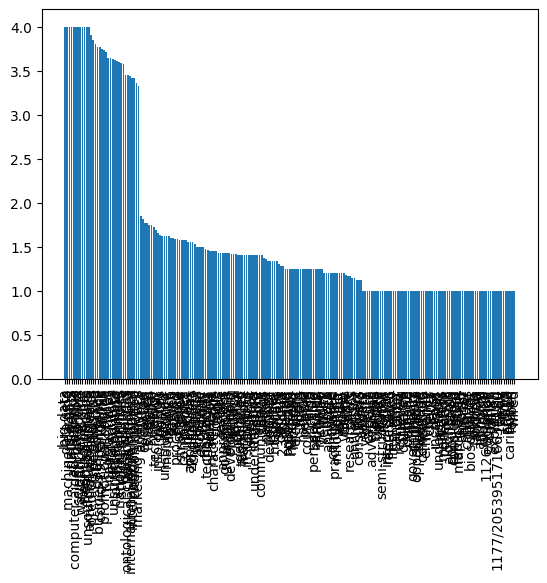

In [5]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

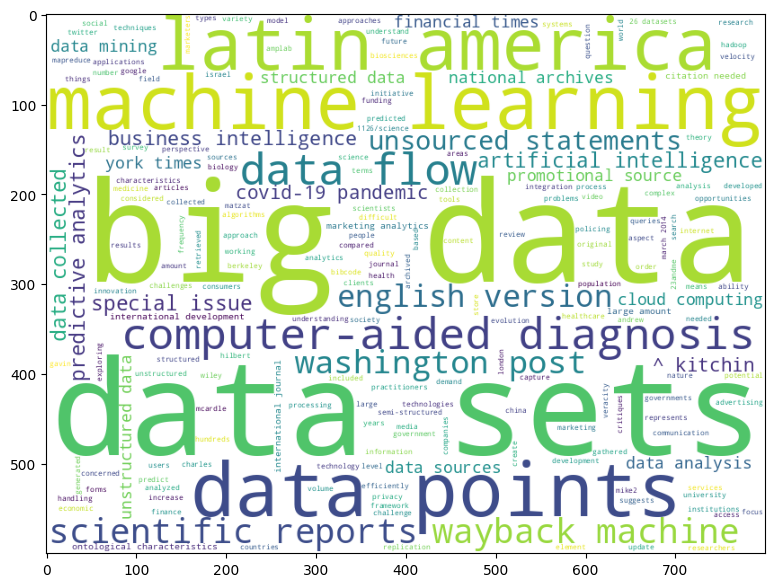

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

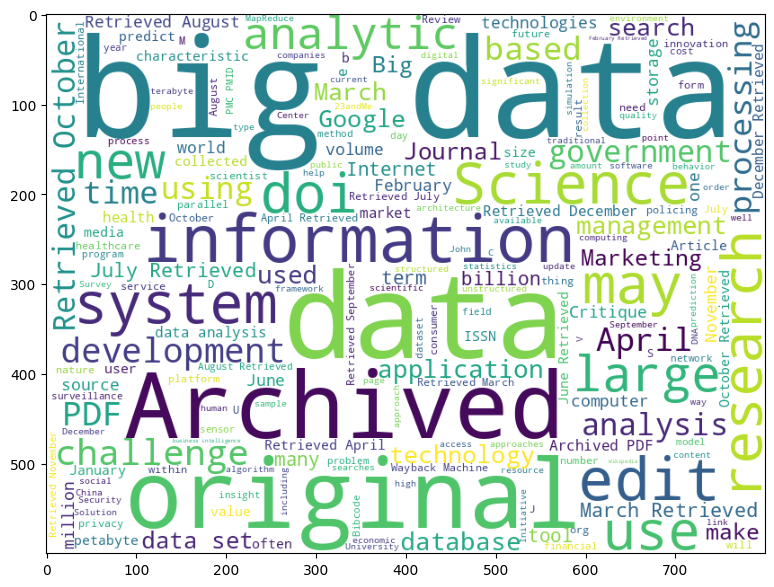

In [7]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [8]:
wc.generate(text).to_file('images/ds_wordcloud_2.png')